In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn import datasets
from sklearn.model_selection import GridSearchCV

from sklearn import tree
from sklearn.tree import export_text    


In [3]:
iris_data = datasets.load_iris()
iris_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
features = iris_data.data
target = iris_data.target

In [5]:
# With grid search, you can find the optimal parameter => parameter tuning

In [6]:
param_grid = {'max_depth': np.arange(1,10)}

In [7]:
features_train, features_test, target_train, target_test = train_test_split(features,target,test_size=0.3, random_state =0)

In [8]:
# In every iteration, we split the data randomly in cross validation 
# Decision tree classifier initializes the tree randomly, That's why you get different results.....

In [9]:
model = GridSearchCV(DecisionTreeClassifier(), param_grid)

In [10]:
model.fit(features_train, target_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [11]:
print("Best parameter in Grid Search" , model.best_params_)

Best parameter in Grid Search {'max_depth': 4}


In [12]:
grid_predictions = model.predict(features_test)

In [13]:
print(confusion_matrix(target_test, grid_predictions))

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


In [14]:
print(accuracy_score(target_test, grid_predictions))

0.9777777777777777


In [15]:
# To create the Decision Tree Visually

#### I used a different variable to call the Decision Tree Classifier again because the tree parameter was not compatible with Grid Search CV. I named it D_tree this time.

In [16]:
D_tree = DecisionTreeClassifier(max_depth=4)
D_tree.fit(features_train, target_train)

DecisionTreeClassifier(max_depth=5)

In [17]:
text_representation = export_text(D_tree)
print(text_representation)

|--- feature_2 <= 2.35
|   |--- class: 0
|--- feature_2 >  2.35
|   |--- feature_2 <= 4.95
|   |   |--- feature_3 <= 1.65
|   |   |   |--- class: 1
|   |   |--- feature_3 >  1.65
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |--- feature_2 >  4.95
|   |   |--- feature_2 <= 5.05
|   |   |   |--- feature_1 <= 2.75
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  2.75
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  5.05
|   |   |   |--- class: 2



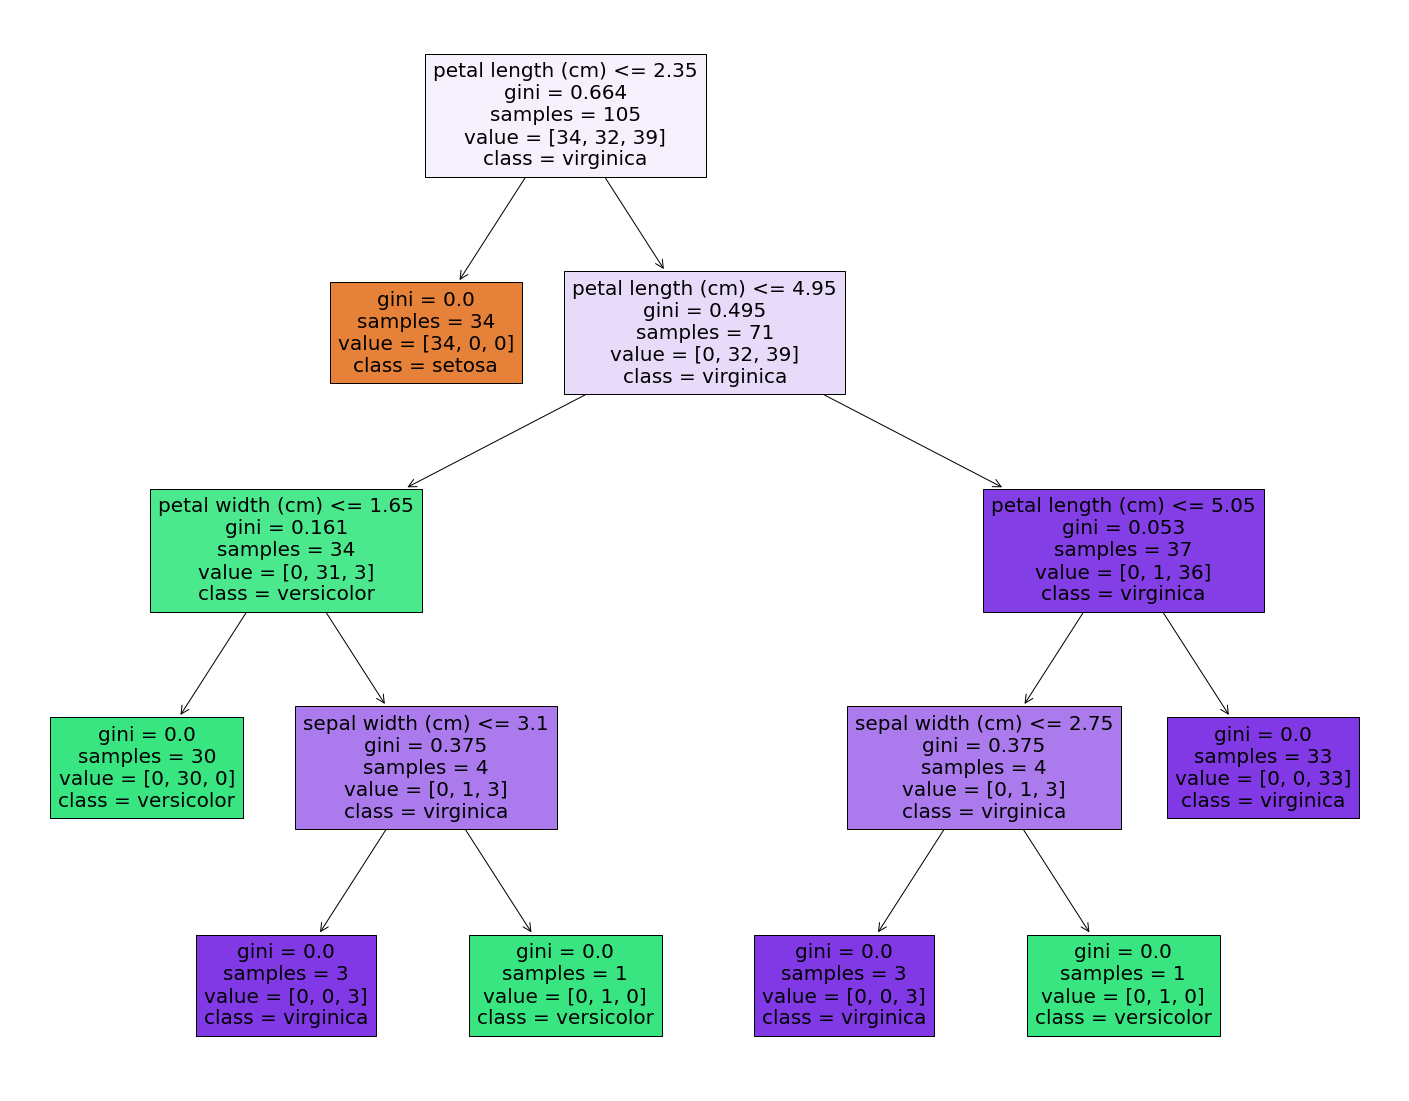

In [18]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(D_tree, 
                   feature_names=iris_data.feature_names,  
                   class_names=iris_data.target_names,
                   filled=True)

#The underscore character (_) is used to indicate that the return value of plot_tree() is not being used in the code. 
#Instead, it is directly plotting the tree onto the figure created using fig

In [19]:
fig.savefig("C:\\Users\\Awais Khan\\Desktop\\Deep Learning Courses by Dr. - Extended Files\\models\\decistion_tree_iris.png")

In [20]:
# read for interpretation
# https://towardsdatascience.com/visualizing-decision-trees-with-python-scikit-learn-graphviz-matplotlib-1c50b4aa68dc



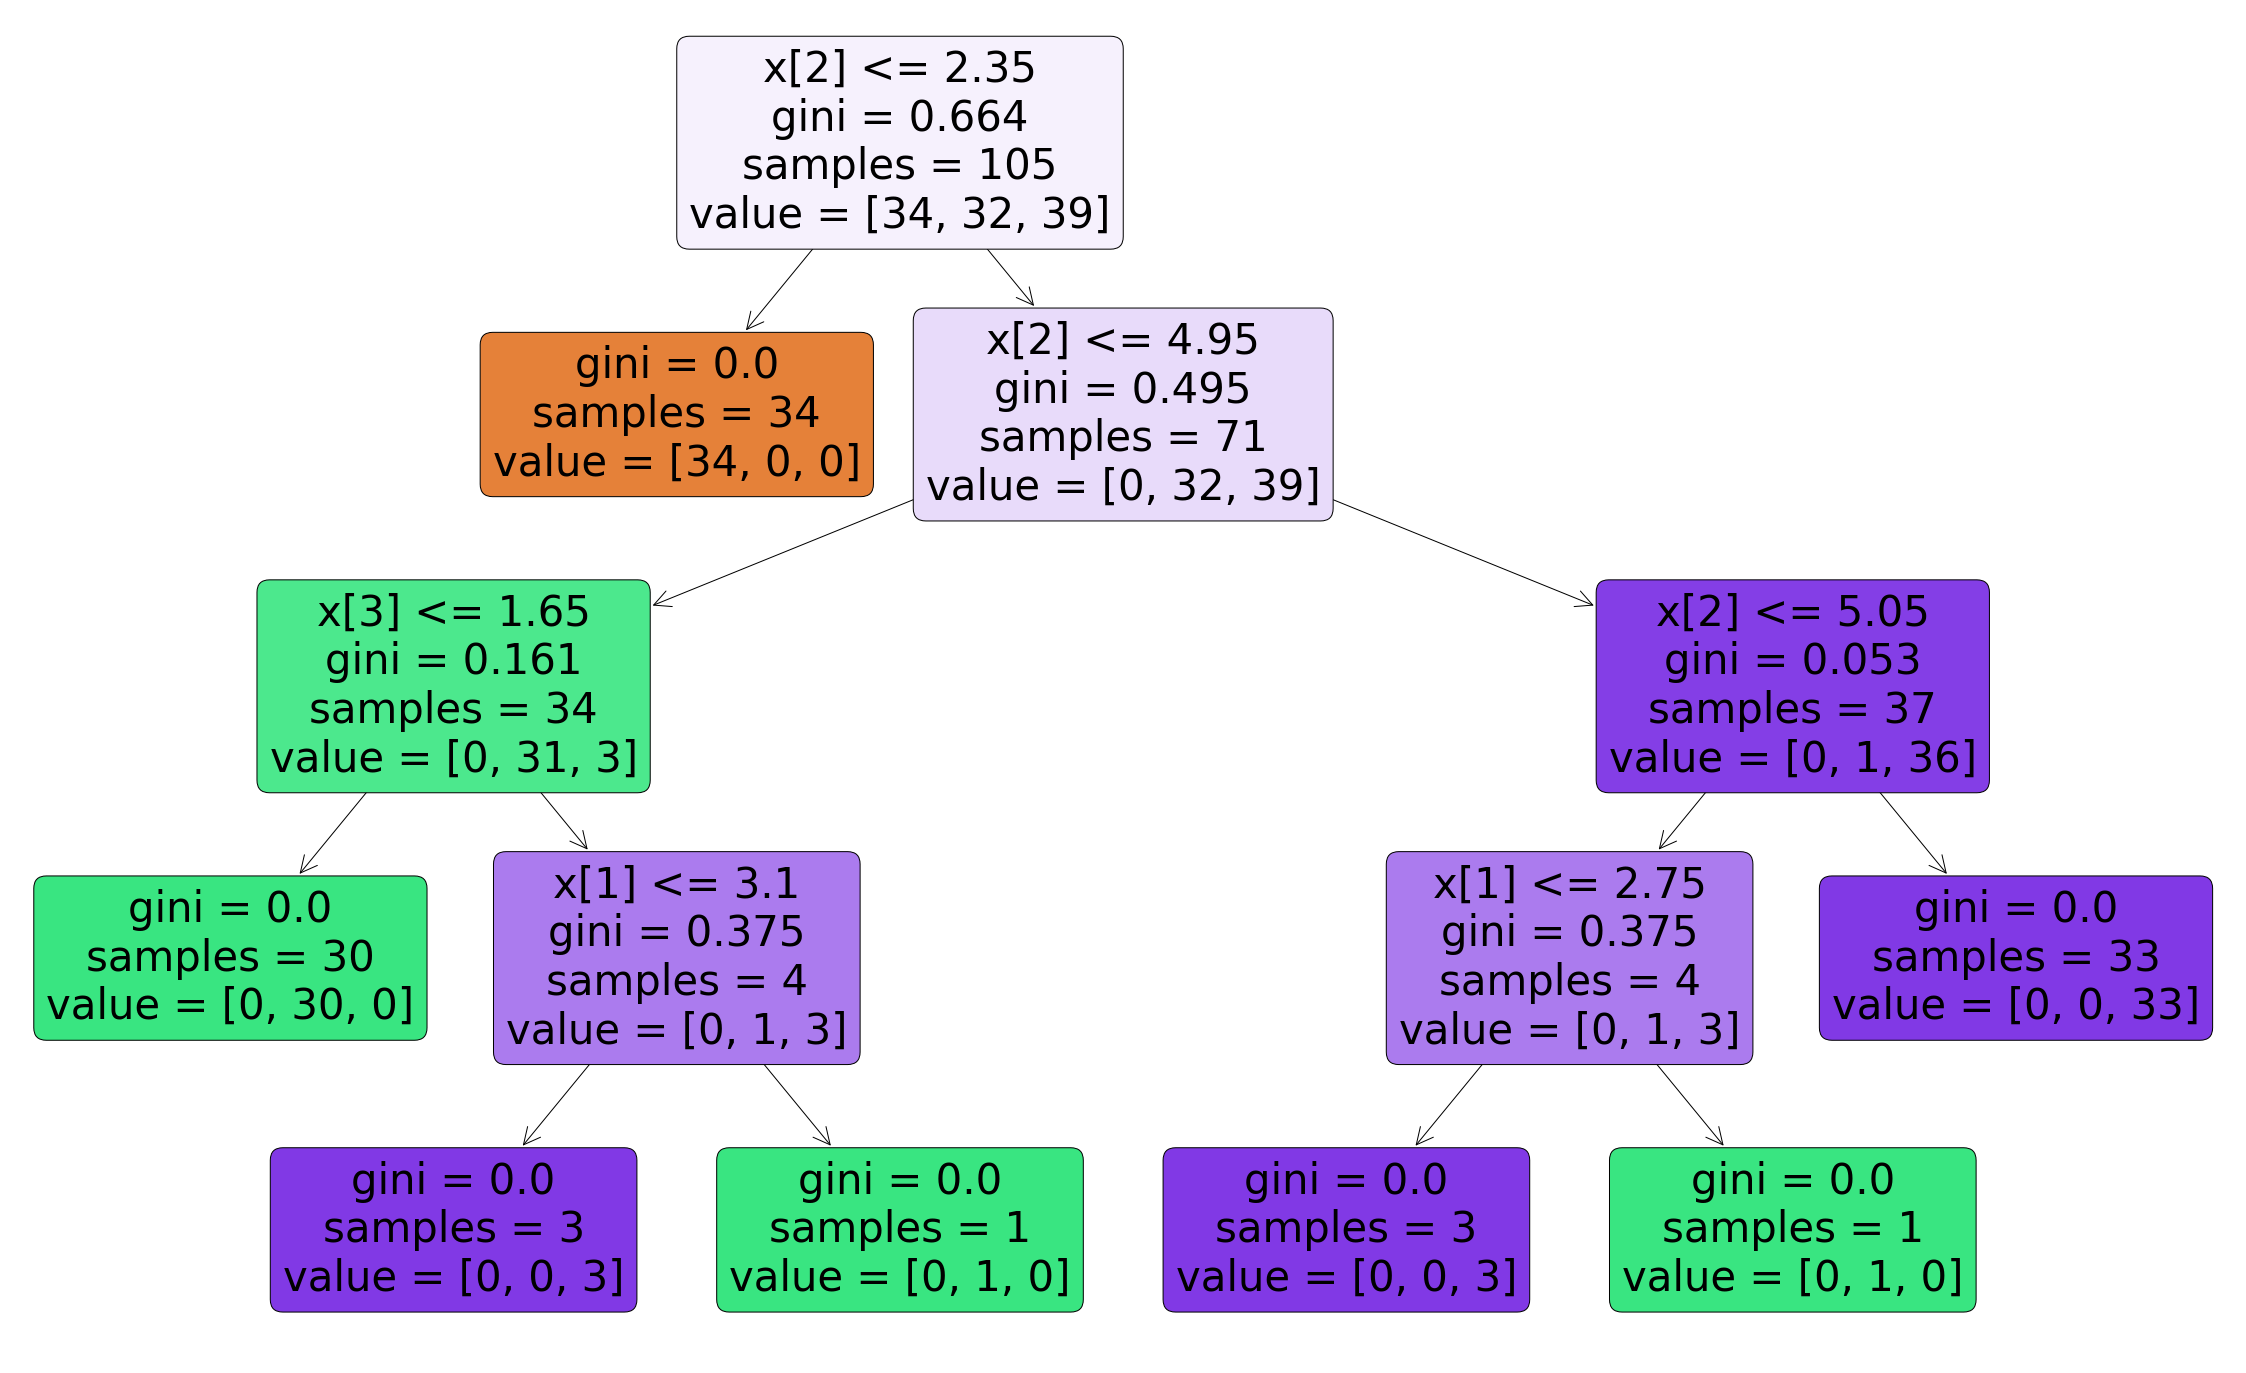

In [20]:
fig= plt.figure(figsize=(40,25))
tree.plot_tree(D_tree, filled = True, rounded = True, max_depth =  4)
plt.show()